In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import linprog


We want to maximize function 
$$f(x) = c^1x^1 + c^2x^2 \to \max$$
subject to an array of inequality constraints
$$A_{11}x^1 + A_{12}x^2 \leqslant b^1$$
$$A_{21}x^1 + A_{22}x^2 \leqslant b^2$$
and predetermined set of bounds
$$x^1 \geqslant 0, x^2 \geqslant 0$$

In our special case we have determined numbers, and the problem above becomes the following problem:

$$f(x, y) = 180x + 200y \to \max$$
$$5x + 4y \leqslant 80$$
$$10x + 20y \leqslant 200$$
$$x \geqslant 0, y \geqslant 0$$

In [2]:
c = [-180, -200]
#c = [-1, 0]
A = [[5, 4], [10, 20]]
b = [80, 200]
x0_bounds = (0, None)
x1_bounds = (0, None)
res = linprog(c, A_ub=A, b_ub=b, bounds=(x0_bounds, x1_bounds), options={"disp": True})

Running HiGHS 1.2.0 [date: 2021-07-09, git hash: n/a]
Copyright (c) 2022 ERGO-Code under MIT licence terms
Presolving model
2 rows, 2 cols, 4 nonzeros
2 rows, 2 cols, 4 nonzeros
Presolve : Reductions: rows 2(-0); columns 2(-0); elements 4(-0) - Not reduced
Problem not reduced by presolve: solving the LP
Using EKK dual simplex solver - serial
  Iteration        Objective     Infeasibilities num(sum)
          0    -4.7499962151e+01 Ph1: 2(4.125); Du: 2(47.5) 0s
          2    -3.0666666667e+03 Pr: 0(0) 0s
Model   status      : Optimal
Simplex   iterations: 2
Objective value     : -3.0666666667e+03
HiGHS run time      :          0.00


In [3]:
res.x

array([13.33333333,  3.33333333])

So for the sharp problem 
$$f(x, y) = 180x + 200y \to \max$$
$$5x + 4y \leqslant 80$$
$$10x + 20y \leqslant 200$$
$$x \geqslant 0, y \geqslant 0$$
We have a sharp solution
$$x = 13.3333, y = 3.3333$$
What if we change sharp costraints into soft ones?
$$f(x, y) = 180x + 200y \to \max$$
$$C_1 = -5x - 4y + 80 \gtrsim 0$$
$$C_2 = -10x - 20y + 200 \gtrsim 0$$
$$x \geqslant 0, y \geqslant 0$$
where $C_1$ and $C_2$ are ill-known subsets of $2^R$.

The probability of satisfaction of all constraints in this case are given by
$$P = \min{(\mu(C_1), \mu(C_2))}$$
We want to maximize this probability, in other words we have a problem
$$\min{(\mu(C_1), \mu(C_2))} \to \max\limits_{C_1, C_2}$$
which concidering the monotonicity of $\mu(x)$ acquires the form
$$z = \min{(C_1, C_2)} \to \max\limits_{C_1, C_2}$$
This is a well known known linear programming problem, which can be rewritten as follows:
$$z \to \max$$
$$C_1 \geq z$$
$$C_2 \geq z$$
Or, in more detail
$$z \to \max$$
$$5x + 4y \leq z + 80$$
$$10x + 20y \leq z + 200$$
This is a linear programming problem with constraints, which are not stationary.
Note that 
$$z = -10x - 20y + 200 ~~ (x \leq 13.3333)$$
$$z = -5x - 4y + 80 ~~ (x \geq 13.3333)$$
so our problem divides into 2 separate ones with additional constraints.


---
Пусть есть система мягких ограничений

$$5x + 4y \lesssim 80$$
$$10x + 20y \lesssim 280$$
Перепишем в виде (см. тетрадь):
$$-1x^1 ↝ min$$
$$x^1 + 5x^2 + 4x^3 \leq 80$$
$$x^1 + 10x^2 + 20x^3 \leq 200$$



In [4]:
maximize_eq = [-1, 0, 0]
A_ub = [[1, 5, 4], [1, 10, 20]]
b_ub = [80, 200]
A_eq = [[0, 0, 0], [0, 0, 0]]
b_eq = [0, 0]
bounds = ((None, None), (0, np.inf), (0, np.inf))
print(f'maximize_eq = {maximize_eq} \nA_ub = {A_ub}\nb_ub = {b_ub}\n\nbounds = {bounds}')

maximize_eq = [-1, 0, 0] 
A_ub = [[1, 5, 4], [1, 10, 20]]
b_ub = [80, 200]

bounds = ((None, None), (0, inf), (0, inf))


In [5]:
res = linprog(maximize_eq, A_ub, b_ub, A_eq, b_eq, bounds, options={"disp": True})
print(f'res.x = {res.x}')

res.x = [80.  0.  0.]
Running HiGHS 1.2.0 [date: 2021-07-09, git hash: n/a]
Copyright (c) 2022 ERGO-Code under MIT licence terms
Presolving model
0 rows, 0 cols, 0 nonzeros
0 rows, 0 cols, 0 nonzeros
Presolve : Reductions: rows 0(-4); columns 0(-3); elements 0(-6) - Reduced to empty
Solving the original LP from the solution after postsolve
Model   status      : Optimal
Objective value     : -8.0000000000e+01
HiGHS run time      :          0.00


Для исходной проблемы
$$5x + 4y \lesssim 80$$
$$10x + 20y \lesssim 280$$

получили решение
$$max(\mu(⋅)) ↝ 10^{-12} \to 0$$
$$x = 12.3$$
$$y = 3.7$$

тогда как для такой же проблемы в случае жёстких ограничений получены значения
$$x = 8$$
$$y = 10$$

---
На примере задачи с инвестиционным портфелем: система мягких ограничений
$$\beta_{i1} \gtrsim \beta_{j1}$$
$$\vdots$$
$$\beta_{is} \gtrsim \beta_{js} $$
свелась к задаче линейного программирования

$$z ↝ max$$
$$\beta_{i1} - \beta_{j1} \geqslant z$$
$$\vdots$$
$$\beta_{is} - \beta_{js} \geqslant z$$
$$\beta_1x_1 + \dots + \beta_nx_n = d$$
$$\beta_1 + ... + \beta_n = 1$$

В двумерном случае задача примет вид
$$-1x^1 ↝ min$$
$$x^1 - x^2 + x^3 \leqslant 0$$
$$x^1 - x^2 + x^4 \leqslant 0$$
$$561x^2 + 561x^3 + 2617x^4 = 2000$$
$$x^2 + x^3 + x^4 = 1$$

In [6]:
maximize_eq = [-1, 0, 0, 0]
A_ub = [[1, -1, 1, 0], [1, -1, 0, 1]]
b_ub = [0, 0]
A_eq = [[0, 561, 561, 2617], [0, 1, 1, 1]]
b_eq = [2000, 1]
bounds = ((-np.inf, np.inf), (0, 1), (0, 1), (0, 1))
print(f'maximize_eq = {maximize_eq} \nA_ub = {A_ub}\nb_ub = {b_ub}\nA_eq = {A_eq}\nb_eq = {b_eq}\nbounds = {bounds}')

maximize_eq = [-1, 0, 0, 0] 
A_ub = [[1, -1, 1, 0], [1, -1, 0, 1]]
b_ub = [0, 0]
A_eq = [[0, 561, 561, 2617], [0, 1, 1, 1]]
b_eq = [2000, 1]
bounds = ((-inf, inf), (0, 1), (0, 1), (0, 1))


In [7]:
res = linprog(maximize_eq, A_ub, b_ub, A_eq, b_eq, bounds, options={"disp": True})
print(f'res.x = {res.x}')

res.x = [-0.39980545  0.30009728  0.          0.69990272]Running HiGHS 1.2.0 [date: 2021-07-09, git hash: n/a]
Copyright (c) 2022 ERGO-Code under MIT licence terms

Presolving model
4 rows, 4 cols, 12 nonzeros
3 rows, 3 cols, 8 nonzeros
0 rows, 0 cols, 0 nonzeros
Presolve : Reductions: rows 0(-4); columns 0(-4); elements 0(-12) - Reduced to empty
Solving the original LP from the solution after postsolve
Model   status      : Optimal
Objective value     :  3.9980544747e-01
HiGHS run time      :          0.00


Для проблемы
$$-1x^1 ↝ min$$
$$x^1 - x^2 + x^3 \leqslant 0$$
$$x^1 - x^2 + x^4 \leqslant 0$$
$$561x^2 + 561x^3 + 2617x^4 = 2000$$
$$x^2 + x^3 + x^4 = 1$$

получили решение 
$$x^1 = -0.4$$
$$x^2 = 0.3$$
$$x^3 = 0$$
$$x^4 = 0.7$$

То есть для исходной проблемы
$$z ↝ max$$
$$\beta_{1} - \beta_{2} \geqslant z$$
$$\beta_{1} - \beta_{3} \geqslant z$$
$$\beta_1x_1 + \beta_2x_2 + \beta_3x_3 = d$$
$$\beta_1 + \beta_2 + \beta_3 = 1$$

получили
$$z = -0.4$$
$$\beta_1 = 0.3$$
$$\beta_2 = 0$$
$$\beta_3 = 0.7$$

---
Пусть есть система неравенств
$$y \leq x$$
$$y \leq -x + 1$$
$$y \geq 0$$
Она задаёт чёткий треугольник на плоскости $XOY$

Если в этой системе заменить все жёсткие ограничения на мягкие, то получим систему мягких ограничений
$$x-y \gtrsim 0$$
$$-x-y-1 \gtrsim 0$$
$$y \gtrsim 0$$

которая сводится к задаче линейного программирования
$$-1x^1 \to min$$
$$x^1-x^2+x^3 \leq0$$
$$x^1+x^2+x^3 \leq -1$$
$$x^1-x^3\leq0$$


In [8]:
from scipy.optimize import linprog
maximize_eq = [-1, 0, 0]
A_ub = [[1, -1, 1], [1, 1, 1], [1, 0, -1]]
b_ub = [0, 1, 0]
#bounds = ((-np.inf, np.inf), (0, 1), (0, 1), (0, 1))

#print(f'maximize_eq = {maximize_eq} \nA_ub = {A_ub}\nb_ub = {b_ub}\nA_eq = {A_eq}\nb_eq = {b_eq}\nbounds = {bounds}')

In [9]:
res = linprog(maximize_eq, A_ub, b_ub, options={"disp": True})
print(f'res.x = {res.x}')

Running HiGHS 1.2.0 [date: 2021-07-09, git hash: n/a]
Copyright (c) 2022 ERGO-Code under MIT licence terms
Presolving model
3 rows, 3 cols, 8 nonzeros
2 rows, 2 cols, 4 nonzeros
0 rows, 0 cols, 0 nonzeros
0 rows, 0 cols, 0 nonzeros
Presolve : Reductions: rows 0(-3); columns 0(-3); elements 0(-8) - Reduced to empty
Solving the original LP from the solution after postsolve
Model   status      : Optimal
Objective value     : -2.5000000000e-01
HiGHS run time      :          0.00
res.x = [0.25 0.5  0.25]


(-0.1, 0.6)

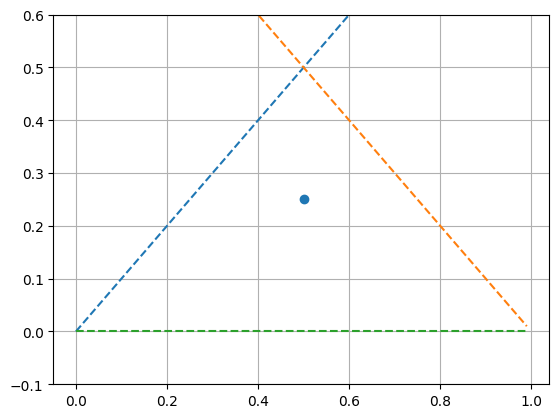

In [10]:
N = 100
x = np.arange(0, 1, 1/N)
y_1 = x
y_2 = -x + 1
y_3 = np.zeros(N)
#y_2 = np.concatenate(np.linspace(0, 0.5, N/2), np.linspace(0.5, 0, N/2))
plt.plot(x, y_1, '--')
plt.plot(x, y_2, '--')
plt.plot(x, y_3, '--')
plt.grid()
plt.scatter(0.5, 0.25)
plt.ylim(-0.1, 0.6)

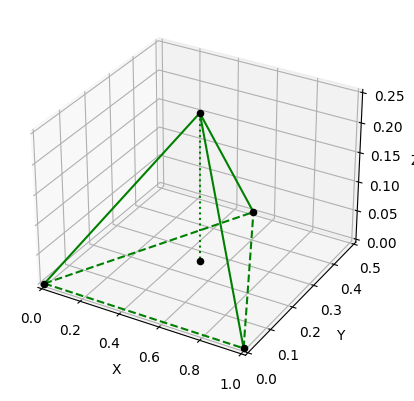

In [11]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(projection='3d')

ax.set_xlabel('X')
ax.set_xlim3d(0, 1)
ax.set_ylabel('Y')
ax.set_ylim3d(0, 0.5)
ax.set_zlabel('Z')
ax.set_zlim3d(0, 0.25)

ax.scatter3D(0.5, 0.25, 0.25, c='0')
ax.scatter3D(0, 0, 0, c='0')
ax.scatter3D(1, 0, 0, c='0')
ax.scatter3D(0.5, 0.5, 0, c='0')
ax.scatter3D(0.5, 0.25, 0, c='0')

ax.plot3D([0.5, 0], [0.25, 0], [0.25, 0], c='g')
ax.plot3D([0.5, 1], [0.25, 0], [0.25, 0], c='g')
ax.plot3D([0.5, 0.5], [0.25, 0.5], [0.25, 0], c='g')
ax.plot3D([0, 1], [0, 0], [0, 0], '--', c='g')
ax.plot3D([1, 0.5], [0, 0.5], [0, 0], '--', c='g')
ax.plot3D([0, 0.5], [0, 0.5], [0, 0], '--', c='g')
ax.plot3D([0.5, 0.5], [0.25, 0.25], [0.25, 0], ":", c='g')

#x = [0, 0, 1, 1, 0]
#y = [0, 1, 1, 0, 0]
#z = [0, 0, 0, 0, 0]
#ax.plot(x, y, z, label='line 1')


---
Рассмотрим другую систему неравенств, которая неограничена:
$$y \geq -2x +2$$
$$y \geq 0.25x -0.25$$
$$y \leq 2x+2$$
$$y \leq x+3$$
Сведём к задаче линейного программирования:
$$-1x^1 \to \min$$
$$x^1 - 2x^2 -x^3 \leq -2$$
$$x^1 + 0.25 x^2 -x^3 \leq 0.25$$
$$x^1 - 2x^2 +3x^3 \leq 2$$
$$x^1 -x^2+x^3\leq3$$


In [12]:
maximize_eq = [-1, 0, 0]
A_ub = [[1, -2, -1], [1, 0.25, -1], [1, -2, 3], [1, -1, 1]]
b_ub = [-2, 0.25, 2, 3]
res = linprog(maximize_eq, A_ub, b_ub, options={"disp": True})
print(f'res.x = {res.x}')

res.x = NoneRunning HiGHS 1.2.0 [date: 2021-07-09, git hash: n/a]
Copyright (c) 2022 ERGO-Code under MIT licence terms

Presolving model
4 rows, 3 cols, 12 nonzeros
4 rows, 3 cols, 12 nonzeros
Presolve : Reductions: rows 4(-0); columns 3(-0); elements 12(-0) - Not reduced
Problem not reduced by presolve: solving the LP
Using EKK dual simplex solver - serial
  Iteration        Objective     Infeasibilities num(sum)
          0    -9.9999892924e-01 Ph1: 4(4); Du: 1(0.999999) 0s
          4    -1.3888888889e-01 Ph1: 0(0); Du: 1(0.138889) 0s
          4    -1.0000000000e+00 Pr: 0(0); Du: 1(0.138889) 0s
Model   status      : Unbounded
Simplex   iterations: 4
Objective value     : -1.0000000000e+00
HiGHS run time      :          0.00


Как и ожидалось, такая задача не имеет решения, потому что множество $X$ не является ограниченным. Введём дополнительное ограничение, при котором задача будет иметь решение:
$$y\leq -x+10$$
Тогда задача линейного программирования примет вид:
$$-1x^1 \to \min$$
$$x^1 - 2x^2 -x^3 \leq -2$$
$$x^1 + 0.25 x^2 -x^3 \leq 0.25$$
$$x^1 - 2x^2 +3x^3 \leq 2$$
$$x^1 -x^2+x^3\leq3$$
$$x^1 + x^2 + x^3 \leq 10$$

In [13]:
maximize_eq = [-1, 0, 0]
A_ub = [[1, -2, -1], [1, 0.25, -1], [1, -2, 3], [1, -1, 1], [1, 1, 1]]
b_ub = [-2, 0.25, 2, 3, 10]
res = linprog(maximize_eq, A_ub, b_ub, options={"disp": True})
print(f'res.x = {res.x}')

Running HiGHS 1.2.0 [date: 2021-07-09, git hash: n/a]
res.x = [2.16666667 4.73333333 3.1       ]
Copyright (c) 2022 ERGO-Code under MIT licence terms
Presolving model
5 rows, 3 cols, 15 nonzeros
5 rows, 3 cols, 15 nonzeros
Presolve : Reductions: rows 5(-0); columns 3(-0); elements 15(-0) - Not reduced
Problem not reduced by presolve: solving the LP
Using EKK dual simplex solver - serial
  Iteration        Objective     Infeasibilities num(sum)
          0    -9.9999845409e-01 Ph1: 5(5); Du: 1(0.999998) 0s
          4    -2.1666666667e+00 Pr: 0(0) 0s
Model   status      : Optimal
Simplex   iterations: 4
Objective value     : -2.1666666667e+00
HiGHS run time      :          0.00


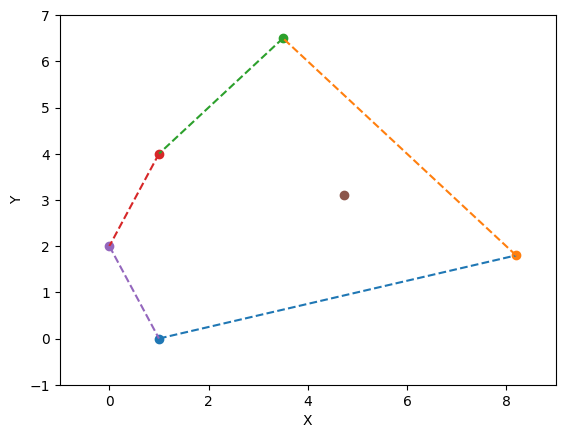

In [14]:
fig = plt.figure()
ax = fig.gca()
ax.set_xlabel('X')
ax.set_xlim(-1, 9)
ax.set_ylabel('Y')
ax.set_ylim(-1, 7)

ax.scatter(1, 0)
ax.scatter(8.2, 1.8)
ax.scatter(3.5, 6.5)
ax.scatter(1, 4)
ax.scatter(0, 2)
ax.scatter(4.7333333, 3.1)

ax.plot([1, 8.2], [0, 1.8], '--')
ax.plot([8.2, 3.5], [1.8, 6.5], '--')
ax.plot([3.5, 1], [6.5, 4], '--')
ax.plot([1, 0], [4, 2], '--')
ax.plot([0, 1], [2, 0], '--')

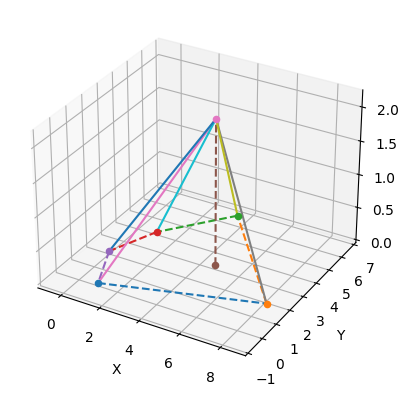

In [15]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')

ax.set_xlabel('X')
ax.set_xlim3d(-1, 9)
ax.set_ylabel('Y')
ax.set_ylim3d(-1, 7)
ax.set_zlabel('Z')
ax.set_zlim3d(0, 2.2)

ax.scatter3D(1, 0, 0)
ax.scatter3D(8.2, 1.8, 0)
ax.scatter3D(3.5, 6.5, 0)
ax.scatter3D(1, 4, 0)
ax.scatter3D(0, 2, 0)
ax.scatter3D(4.7333333, 3.1, 0)
ax.scatter3D(4.7333333, 3.1, 2.1666667)

ax.plot3D([1, 8.2], [0, 1.8], [0, 0], '--')
ax.plot3D([8.2, 3.5], [1.8, 6.5], [0, 0], '--')
ax.plot3D([3.5, 1], [6.5, 4], [0, 0], '--')
ax.plot3D([1, 0], [4, 2], [0, 0], '--')
ax.plot3D([0, 1], [2, 0], [0, 0], '--')
ax.plot3D([4.7333333, 4.7333333], [3.1, 3.1], [0, 2.16666667], '--')
ax.plot3D([1, 4.7333333], [0, 3.1], [0, 2.16666667])
ax.plot3D([8.2, 4.7333333], [1.8, 3.1], [0, 2.16666667])
ax.plot3D([3.5, 4.7333333], [6.5, 3.1], [0, 2.16666667])
ax.plot3D([1, 4.7333333], [4, 3.1], [0, 2.16666667])
ax.plot3D([0, 4.7333333], [2, 3.1], [0, 2.16666667])

---
Что, если имеется случай с параллельными прямыми?
$$y \leq x$$
$$y \geq x-1$$
Сведём к задаче линейного программирования
$$-1x^1 \to \min$$
$$x^1-x^2+x^3 \leq 0$$
$$x^1+x^2-x^3\leq1$$

In [16]:
maximize_eq = [-1, 0, 0]
A_ub = [[1, -1, 1], [1, 1, -1]]
b_ub = [0, 1]
bounds = ((None, None), (2, None), (2, None))
res = linprog(maximize_eq, A_ub, b_ub, bounds=bounds, options={"disp": True})
print(f'res.x = {res.x}')

res.x = [0.5 2.5 2. ]
Running HiGHS 1.2.0 [date: 2021-07-09, git hash: n/a]
Copyright (c) 2022 ERGO-Code under MIT licence terms
Presolving model
2 rows, 3 cols, 6 nonzeros
1 rows, 2 cols, 2 nonzeros
Solving the original LP with primal simplex to determine infeasible or unbounded
Using EKK primal simplex solver
  Iteration        Objective     Infeasibilities num(sum)
          0     0.0000000000e+00 Pr: 0(0); Du: 1(1) 0s
          2    -5.0000000000e-01 Pr: 0(0) 0s
Model   status      : Optimal
Simplex   iterations: 2
Objective value     : -5.0000000000e-01
HiGHS run time      :          0.00


В таком случае у нас имеется множество решений, которое представляет собой прямую, лежащую посередине между двумя ограничениями

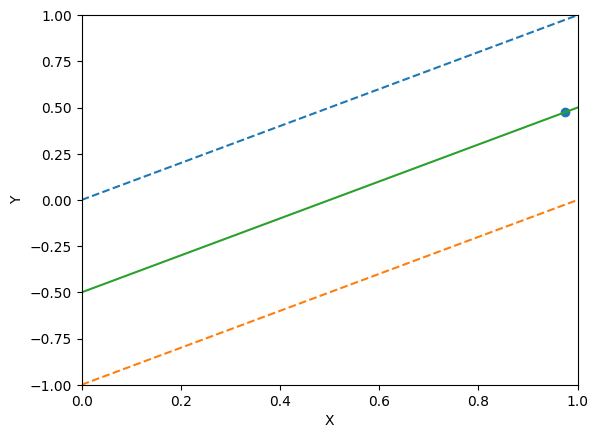

In [17]:
fig = plt.figure()
ax = fig.gca()
ax.set_xlabel('X')
ax.set_xlim(0, 1)
ax.set_ylabel('Y')
ax.set_ylim(-1, 1)

ax.scatter(0.9753697, 0.4753697)

ax.plot([0, 1], [0, 1], '--')
ax.plot([0, 1], [-1, 0], '--')
ax.plot([0, 1], [-0.5, 0.5])

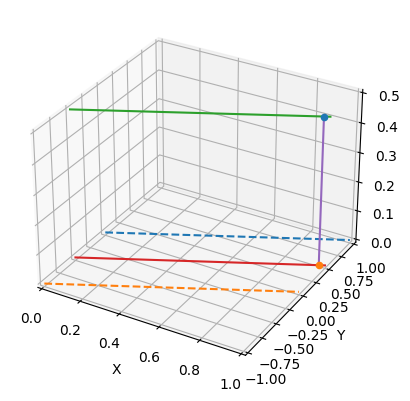

In [18]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')

ax.set_xlabel('X')
ax.set_xlim3d(0, 1)
ax.set_ylabel('Y')
ax.set_ylim3d(-1, 1)
ax.set_zlabel('Z')
ax.set_zlim3d(0, 0.5)

ax.scatter(0.9753697, 0.4753697, 0.5)
ax.scatter(0.9753697, 0.4753697, 0)

ax.plot3D([0, 1], [0, 1], [0, 0], '--')
ax.plot3D([0, 1], [-1, 0], [0, 0], '--')
ax.plot3D([0, 1], [-0.5, 0.5], [0.5, 0.5])
ax.plot3D([0, 1], [-0.5, 0.5], [0, 0])
ax.plot3D([0.9753697, 0.9753697], [0.4753697, 0.4753697], [0, 0.5])

In [19]:
maximize_eq = [-1, 0, 0]
A_ub = [[1, -1, 1], [1, 1, 1], [1, 0, -1]]
b_ub = [0, 1, 0]
bounds = ((None, None), (0.25, 0.25), (0.75, 0.75))
res = linprog(maximize_eq, A_ub, b_ub, bounds=bounds, options={"disp": True})
print(f'res.x = {res.x}')

res.x = [-0.5   0.25  0.75]Running HiGHS 1.2.0 [date: 2021-07-09, git hash: n/a]
Copyright (c) 2022 ERGO-Code under MIT licence terms

Presolving model
0 rows, 0 cols, 0 nonzeros
0 rows, 0 cols, 0 nonzeros
Presolve : Reductions: rows 0(-3); columns 0(-3); elements 0(-8) - Reduced to empty
Solving the original LP from the solution after postsolve
Model   status      : Optimal
Objective value     :  5.0000000000e-01
HiGHS run time      :          0.00


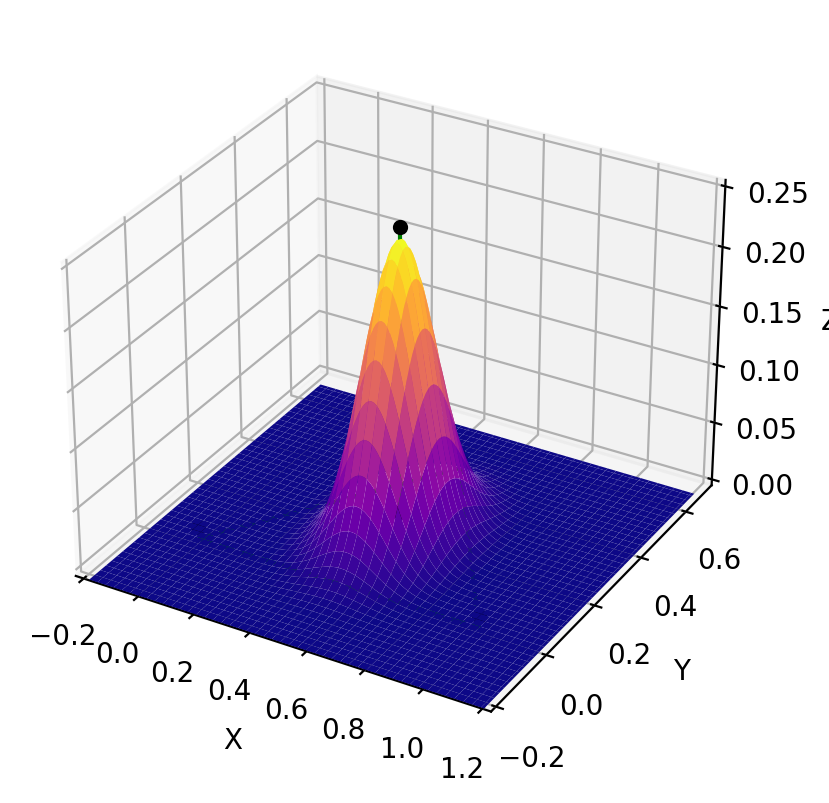

In [22]:
fig = plt.figure(dpi=200)
ax = fig.add_subplot(projection='3d')

ax.set_xlabel('X')
ax.set_xlim3d(-0.2, 1.2)
ax.set_ylabel('Y')
ax.set_ylim3d(-0.2, 0.7)
ax.set_zlabel('Z')
ax.set_zlim3d(0, 0.25)

A = 0.25
B = -0.01
sigma_x = 0.1
sigma_y = 0.1
x_0 = 0.5
y_0 = 0.25
x, y = np.meshgrid(np.arange(-0.2, 1.2, 0.01), np.arange(-0.2, 0.7, 0.01))
z = A * np.exp(    -(x - x_0)**2/(2*sigma_x**2)   -   (y - y_0)**2/(2*sigma_y**2)    ) + B
ax.plot_surface(x, y, z, cmap='plasma')

ax.scatter3D(0.5, 0.25, 0.25, c='0')
ax.scatter3D(0, 0, 0.01, c='0')
ax.scatter3D(1, 0, 0.01, c='0')
ax.scatter3D(0.5, 0.5, 0.01, c='0')
ax.scatter3D(0.5, 0.25, 0.01, c='0')

#ax.plot3D([0.5, 0], [0.25, 0], [0.25, 0], c='g')
#ax.plot3D([0.5, 1], [0.25, 0], [0.25, 0], c='g')
#ax.plot3D([0.5, 0.5], [0.25, 0.5], [0.25, 0], c='g')
ax.plot3D([0, 1], [0, 0], [0, 0], '--', c='g')
ax.plot3D([1, 0.5], [0, 0.5], [0, 0], '--', c='g')
ax.plot3D([0, 0.5], [0, 0.5], [0, 0], '--', c='g')
ax.plot3D([0.5, 0.5], [0.25, 0.25], [0.25, 0], c='g')

